__The first approach__ is to define a color map that maps the 0 to 255 grayscale values to 256 colors. 

###### This can be done by creating an 8-bit color image of size 256 x 1 in order to store all the created colors. 

###### After that, you map the grayscale intensities of the image to the defined colors by means of a lookup table.

##### ``cv2.LUT`` performs Look-up table transform of an array

In [55]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [56]:
def show_with_plt(color_img, title):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

# create a figure() object with appropriate size and title:
plt.figure(figsize=(15, 6))
plt.suptitle("Custom colormaps providing all values", fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Custom colormaps providing all values')

<Figure size 1080x432 with 0 Axes>

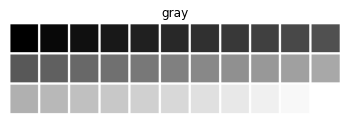

In [57]:
# We load the image using cv2.imread() and using 'cv2.IMREAD_GRAYSCALE' argument:
gray_img = cv2.imread('images/shades.png', cv2.IMREAD_GRAYSCALE)

#Show image:
show_with_plt(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray")

In [58]:
def apply_custom_colormap_values(im_gray):
    """Applies a custom color map using cv2.applyColorMap()"""

    # Create the LUT:
    lut = np.zeros((256, 1, 3), dtype=np.uint8)
    lut[:, 0, 0] = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 253, 251, 249, 247, 245, 242, 241, 238, 237, 235, 233, 231, 229, 227, 225,
                    223, 221, 219, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 195, 193, 191, 189, 187, 185,
                    183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151, 149, 147, 145,
                    143, 141, 138, 136, 134, 132, 131, 129, 126, 125, 122, 121, 118, 116, 115, 113, 111, 109, 107, 105,
                    102, 100, 98, 97, 94, 93, 91, 89, 87, 84, 83, 81, 79, 77, 75, 73, 70, 68, 66, 64, 63, 61, 59, 57,
                    54, 52, 51, 49, 47, 44, 42, 40, 39, 37, 34, 33, 31, 29, 27, 25, 22, 20, 18, 17, 14, 13, 11, 9, 6, 4,
                    2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

    lut[:, 0, 1] = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 196, 194, 192,
                    190, 188, 186, 184, 182, 180, 178, 176, 174, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151,
                    149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 117, 115, 113, 111,
                    109, 107, 105, 103, 101, 99, 97, 95, 93, 91, 89, 87, 85, 83, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64,
                    62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
                    12, 10, 8, 6, 4, 2, 0]

    lut[:, 0, 2] = [195, 194, 193, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 179, 178, 177, 176, 175, 174,
                    173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 155, 154, 153, 152,
                    151, 150, 149, 148, 147, 146, 145, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 131, 130,
                    129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
                    109, 108, 107, 106, 105, 104, 103, 102, 101, 95, 99, 98, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95]

    # Apply color map using cv2.applyColorMap()
    im_color = cv2.applyColorMap(im_gray, lut)
    return im_color

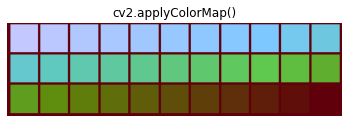

In [59]:
custom_values_1 = apply_custom_colormap_values(gray_img)
show_with_plt(custom_values_1, "cv2.applyColorMap()")


In [60]:
def apply_custom_colormap_values2(im_gray):
    """Applies a custom color map using cv2.LUT()"""

    # Create the LUT:
    lut = np.zeros((256, 3), dtype=np.uint8)
    lut[:, 0] = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 253, 251, 249, 247, 245, 242, 241, 238, 237, 235, 233, 231, 229, 227, 225,
                 223, 221, 219, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 195, 193, 191, 189, 187, 185,
                 183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151, 149, 147, 145,
                 143, 141, 138, 136, 134, 132, 131, 129, 126, 125, 122, 121, 118, 116, 115, 113, 111, 109, 107, 105,
                 102, 100, 98, 97, 94, 93, 91, 89, 87, 84, 83, 81, 79, 77, 75, 73, 70, 68, 66, 64, 63, 61, 59, 57,
                 54, 52, 51, 49, 47, 44, 42, 40, 39, 37, 34, 33, 31, 29, 27, 25, 22, 20, 18, 17, 14, 13, 11, 9, 6, 4,
                 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

    lut[:, 1] = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 196, 194, 192,
                 190, 188, 186, 184, 182, 180, 178, 176, 174, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151,
                 149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 117, 115, 113, 111,
                 109, 107, 105, 103, 101, 99, 97, 95, 93, 91, 89, 87, 85, 83, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64,
                 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
                 12, 10, 8, 6, 4, 2, 0]

    lut[:, 2] = [195, 194, 193, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 179, 178, 177, 176, 175, 174,
                 173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 155, 154, 153, 152,
                 151, 150, 149, 148, 147, 146, 145, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 131, 130,
                 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
                 109, 108, 107, 106, 105, 104, 103, 102, 101, 95, 99, 98, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95]

    # Apply color map using cv2.LUT():
    s0, s1 = im_gray.shape
    im_color = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        im_color[..., i] = cv2.LUT(im_gray, lut[:, i])
    return im_color

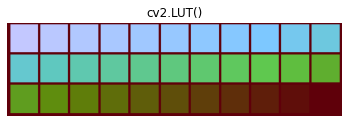

In [61]:
custom_values_2 = apply_custom_colormap_values2(gray_img)
show_with_plt(custom_values_2, "cv2.LUT()")

In [62]:
def apply_rand_custom_colormap_values(im_gray):
    """Applies a random color map using cv2.applyColorMap()"""

    # Create random LUT
    lut = np.random.randint(255, size=(256, 1, 3), dtype=np.uint8)

    # Apply color map using cv2.applyColorMap()
    im_color = cv2.applyColorMap(im_gray, lut)
    return im_color

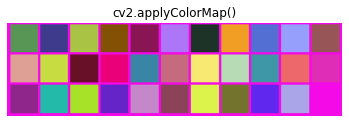

In [63]:
custom_rand_1 = apply_rand_custom_colormap_values(gray_img)
show_with_plt(custom_rand_1, "cv2.applyColorMap()")


In [64]:
def apply_rand_custom_colormap_values2(im_gray):
    """Applies a random color map using cv2.LUT()"""

    # Create random LUT
    lut = np.random.randint(255, size=(256, 3), dtype=np.uint8)

    # Apply color map using cv2.LUT():
    s0, s1 = im_gray.shape
    im_color = np.empty(shape=(s0, s1, 3), dtype=np.uint8)
    for i in range(3):
        im_color[..., i] = cv2.LUT(im_gray, lut[:, i])
    return im_color

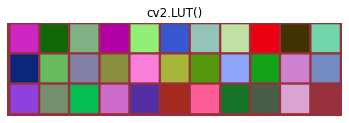

In [65]:
custom_rand_2 = apply_rand_custom_colormap_values2(gray_img)
show_with_plt(custom_rand_2, "cv2.LUT()")